In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats

In [30]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200203_new data'

In [31]:
file=f'{bigDir}\\cellinfo_200203_v10_10.csv'
data1=pd.read_csv(file)

In [32]:
file=f'{bigDir}\\cellinfo_200203_v11_10.csv'
data2=pd.read_csv(file)

In [33]:
data1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'file', 'original cell name', 'movie', 'last frame movie position x',
       'last frame movie position y', 'ab1 (MCM)', 'ab1 ch',
       'ab2 (heterochromatin)', 'ab2 ch', 'DAPI ch', 'category',
       'molecular age ', 'physical age [min]', 'imaging core',
       'cell id for tracking', 'group', 'path', 'nuc_vol_total',
       'inner_vol_total', 'outer_vol_total', 'nuc_mcm_total',
       'inner_mcm_total', 'outer_mcm_total', 'nuc_vol_het', 'inner_vol_het',
       'outer_vol_het', 'nuc_mcm_het', 'inner_mcm_het', 'outer_mcm_het',
       'nuc_vol_eu', 'inner_vol_eu', 'outer_vol_eu', 'nuc_mcm_eu',
       'inner_mcm_eu', 'outer_mcm_eu', 'nuc_DAPI_total', 'inner_DAPI_total',
       'outer_DAPI_total', 'nuc_DAPI_het', 'inner_DAPI_het', 'outer_DAPI_het',
       'nuc_DAPI_eu', 'inner_DAPI_eu', 'outer_DAPI_eu', 'nuc_hp1b_total',
       'inner_hp1b_total', 'outer_hp1b_total', 'nuc_hp1b_het',
       'inner_hp1b_het

In [34]:
data1=data1.drop(columns=['nuc_DAPI_total', 'inner_DAPI_total',
       'outer_DAPI_total', 'nuc_DAPI_het', 'inner_DAPI_het', 'outer_DAPI_het',
       'nuc_DAPI_eu', 'inner_DAPI_eu', 'outer_DAPI_eu', 'nuc_hp1b_total',
       'inner_hp1b_total', 'outer_hp1b_total', 'nuc_hp1b_het',
       'inner_hp1b_het', 'outer_hp1b_het', 'nuc_hp1b_eu', 'inner_hp1b_eu',
       'outer_hp1b_eu', 'day', 'physical_age', 'mol_age_mod'])
data2=data2.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'file', 'original cell name', 'movie',
       'last frame movie position x', 'last frame movie position y',
       'ab1 (MCM)', 'ab1 ch', 'ab2 (heterochromatin)', 'ab2 ch', 'DAPI ch',
       'category', 'molecular age ', 'physical age [min]', 'imaging core',
       'cell id for tracking', 'group', 'path', 'nuc_vol_total',
       'inner_vol_total', 'outer_vol_total', 'nuc_mcm_total',
       'inner_mcm_total', 'outer_mcm_total', 'nuc_vol_het', 'inner_vol_het',
       'outer_vol_het', 'nuc_mcm_het', 'inner_mcm_het', 'outer_mcm_het',
       'nuc_vol_eu', 'inner_vol_eu', 'outer_vol_eu', 'nuc_mcm_eu',
       'inner_mcm_eu', 'outer_mcm_eu'])

In [35]:
data=data1.join(data2)

In [36]:
data=data.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1'])

In [37]:
data.loc[data.category=='middel G1','category']='middleG1'

In [38]:
data.head()

,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,outer_hp1b_total,nuc_hp1b_het,inner_hp1b_het,outer_hp1b_het,nuc_hp1b_eu,inner_hp1b_eu,outer_hp1b_eu,day,physical_age,mol_age_mod
0,20200203_cell_00.ciz,20200203-06-13-63X 16bit,20200203 simcmxy06,647.518,153.039,MCM3,1.0,HP1beta,2.0,3.0,...,593140967.0,411417481.0,280431564.0,130985917.0,531366362.0,69211312.0,462155050.0,d20200203,2.333333,0.225
1,20200203_cell_01.ciz,20200203-06-25-63X 16bit,20200203 simcmxy06,1490.165,332.591,MCM3,1.0,HP1beta,2.0,3.0,...,473099293.0,284459269.0,137123780.0,147335489.0,380671134.0,54907330.0,325763804.0,d20200203,1.333333,0.166
2,20200203_cell_02.ciz,20200203-06-27-63X 16bit,20200203 simcmxy06,1560.535,380.034,MCM3,1.0,HP1beta,2.0,3.0,...,438825571.0,257712769.0,142562608.0,115150161.0,359260858.0,35585448.0,323675410.0,d20200203,1.333333,0.166
3,20200203_cell_03.ciz,20200203-06-29-63X 16bit,20200203 simcmxy06,930.763,391.252,MCM3,1.0,HP1beta,2.0,3.0,...,758335461.0,488267621.0,294355848.0,193911773.0,664738142.0,100314454.0,564423688.0,d20200203,6.833333,0.684
4,20200203_cell_04.ciz,20200203-06-51-63X 16bit,20200203 simcmxy06,1653.035,635.701,MCM3,1.0,HP1beta,2.0,3.0,...,630264462.0,434549898.0,243834433.0,190715465.0,533609229.0,94060232.0,439548997.0,d20200203,4.166667,0.376


In [39]:
data.to_csv(file.replace("v11","v12"))

# 10 % threshold

In [40]:
data=data.loc[data.group=='siLuc']

<IPython.core.display.Javascript object>


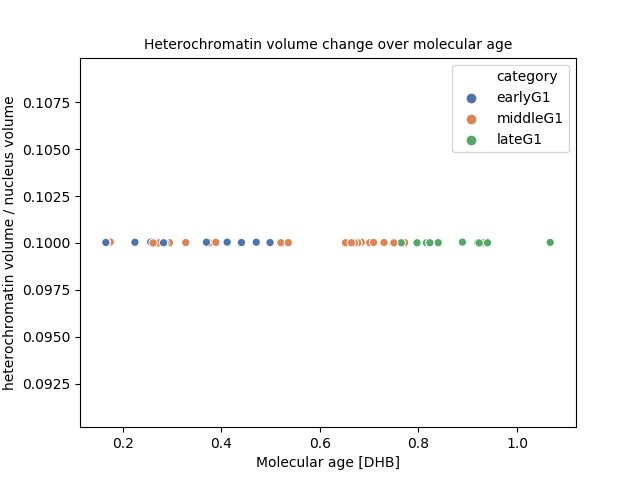

Text(0.5, 1.0, 'Heterochromatin volume change over molecular age')

In [41]:
%matplotlib notebook
data['temp']=data.nuc_vol_het/data.nuc_vol_total
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:], hue='category',
                  hue_order=labels,palette='deep')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('Heterochromatin volume change over molecular age',fontsize=10)

## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


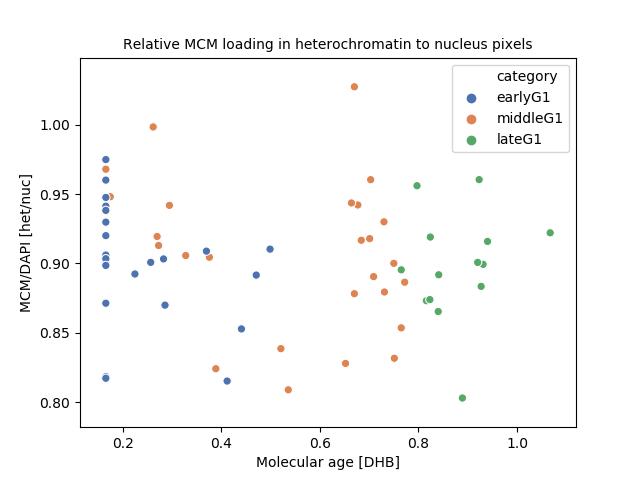

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [42]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


<IPython.core.display.Javascript object>


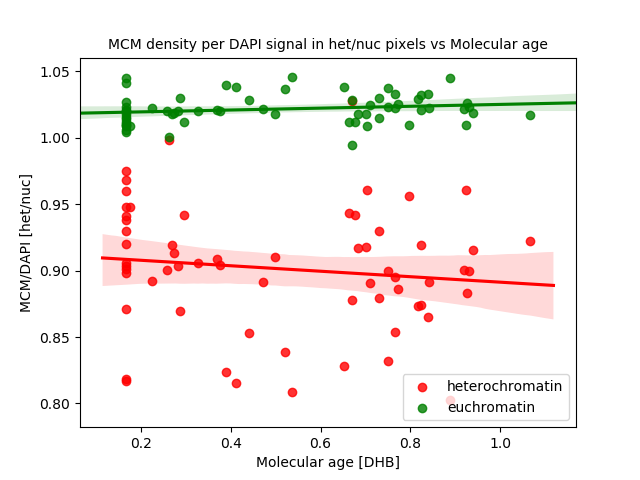

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [43]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_DAPI_eu)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

## Boxplot of relative mcm loading 

<IPython.core.display.Javascript object>


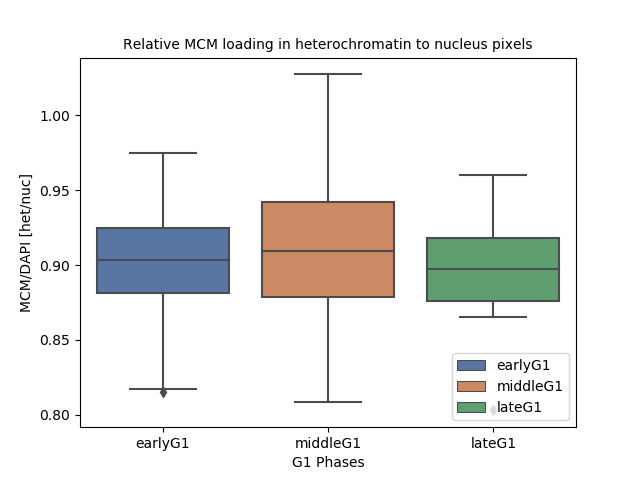

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [44]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.boxplot(x='category',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',order=['earlyG1','middleG1','lateG1'],hue_order=labels,dodge=False,palette='deep')
ax.legend(loc='lower right')
plt.xlabel('G1 Phases')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)



## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


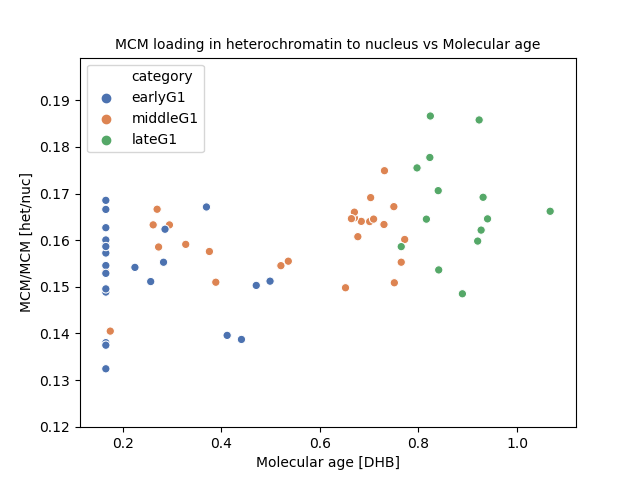

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [45]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

## MCM loading to euchromatin to nucleus

<IPython.core.display.Javascript object>


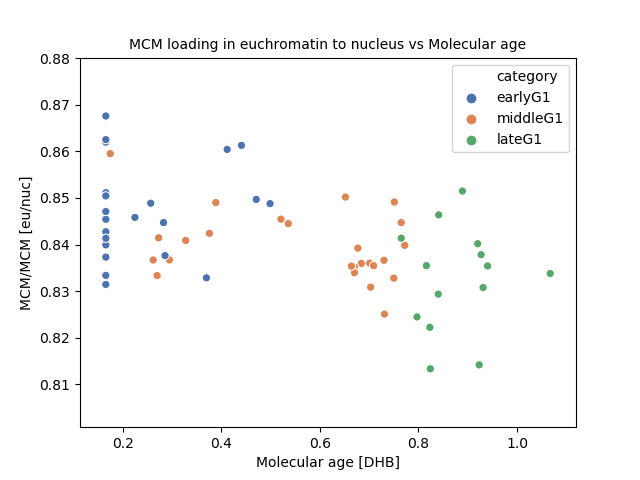

Text(0.5, 1.0, 'MCM loading in euchromatin to nucleus vs Molecular age')

In [46]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_eu/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [eu/nuc]')
plt.title('MCM loading in euchromatin to nucleus vs Molecular age', fontsize=10)

## MCM loading in heterochromatin and euchromatin to nucleus

<IPython.core.display.Javascript object>


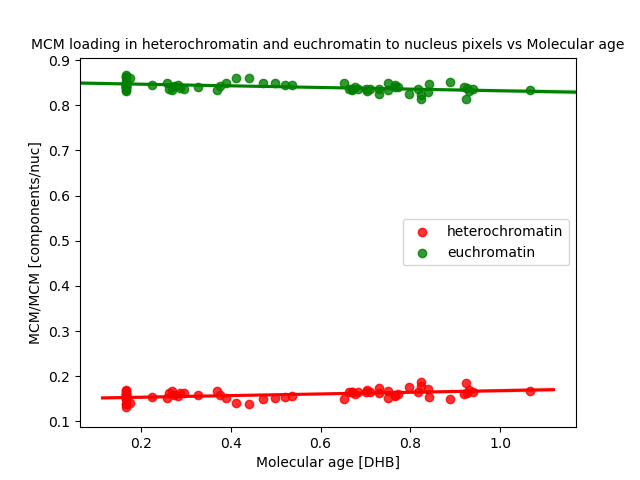

Text(0.5, 1.0, 'MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age')

In [47]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [components/nuc]')
plt.title('MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age', fontsize=10)

<IPython.core.display.Javascript object>


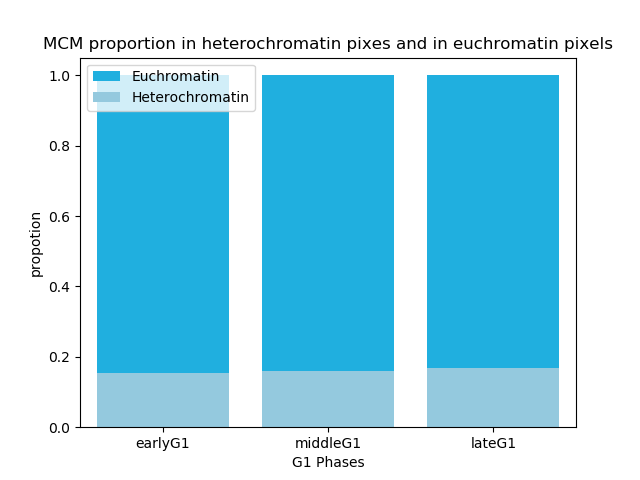

In [48]:
%matplotlib notebook
datatemp=data.loc[(['G1' in x for x in data.category]),:].copy()
datatemp['temp']=datatemp.nuc_mcm_het/datatemp.nuc_mcm_total
datatemp['temp1']=datatemp.nuc_mcm_eu/datatemp.nuc_mcm_total
datatemp['temp2']=datatemp['temp']+datatemp['temp1']
barhet = datatemp.loc[:,'temp']
bareu = datatemp.loc[:,'temp1']

xaxis=datatemp['category']
categories=['earlyG1','middleG1','lateG1']
ax = sns.barplot(x="category", y="temp2", data=datatemp,
                 order=["earlyG1", "middleG1",'lateG1'],color="deepskyblue",label="Euchromatin",ci=None)
sns.barplot(x="category",y="temp",data=datatemp,order=["earlyG1", "middleG1",'lateG1'],
            color="skyblue",label="Heterochromatin",ci=None)
plt.xlabel('G1 Phases')
plt.ylabel('propotion')
plt.title('MCM proportion in heterochromatin pixes and in euchromatin pixels')
plt.show()
#comp=['Heterochromatin','Euchromatin']
plt.legend(loc=2)

# 50% thershold

In [49]:
file=f'{bigDir}\\cellinfo_200203_v10_50.csv'
data1=pd.read_csv(file)

file=f'{bigDir}\\cellinfo_200203_v11_50.csv'
data2=pd.read_csv(file)


data1=data1.drop(columns=['nuc_DAPI_total', 'inner_DAPI_total',
       'outer_DAPI_total', 'nuc_DAPI_het', 'inner_DAPI_het', 'outer_DAPI_het',
       'nuc_DAPI_eu', 'inner_DAPI_eu', 'outer_DAPI_eu', 'nuc_hp1b_total',
       'inner_hp1b_total', 'outer_hp1b_total', 'nuc_hp1b_het',
       'inner_hp1b_het', 'outer_hp1b_het', 'nuc_hp1b_eu', 'inner_hp1b_eu',
       'outer_hp1b_eu', 'day', 'physical_age', 'mol_age_mod'])
data2=data2.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'file', 'original cell name', 'movie',
       'last frame movie position x', 'last frame movie position y',
       'ab1 (MCM)', 'ab1 ch', 'ab2 (heterochromatin)', 'ab2 ch', 'DAPI ch',
       'category', 'molecular age ', 'physical age [min]', 'imaging core',
       'cell id for tracking', 'group', 'path', 'nuc_vol_total',
       'inner_vol_total', 'outer_vol_total', 'nuc_mcm_total',
       'inner_mcm_total', 'outer_mcm_total', 'nuc_vol_het', 'inner_vol_het',
       'outer_vol_het', 'nuc_mcm_het', 'inner_mcm_het', 'outer_mcm_het',
       'nuc_vol_eu', 'inner_vol_eu', 'outer_vol_eu', 'nuc_mcm_eu',
       'inner_mcm_eu', 'outer_mcm_eu'])

data=data1.join(data2)

In [50]:
data.loc[data.category=='middel G1','category']='middleG1'

In [51]:
data.to_csv(file.replace("v11","v12"))

In [53]:
data=data.loc[data.group=='siLuc']

<IPython.core.display.Javascript object>


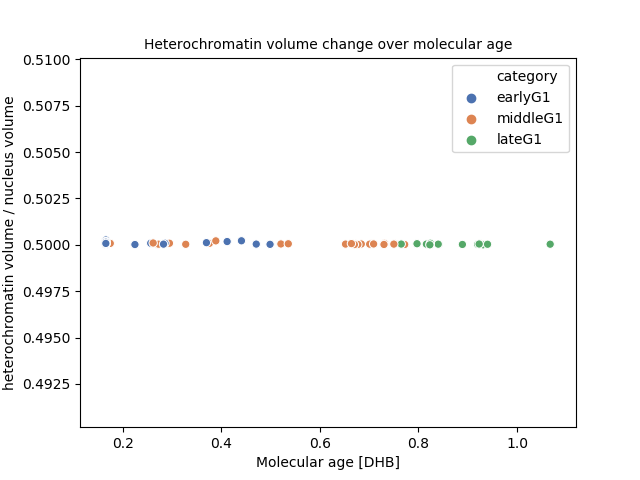

Text(0.5, 1.0, 'Heterochromatin volume change over molecular age')

In [54]:
%matplotlib notebook
data['temp']=data.nuc_vol_het/data.nuc_vol_total
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:], hue='category',
                  hue_order=labels,palette='deep')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('Heterochromatin volume change over molecular age',fontsize=10)

## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


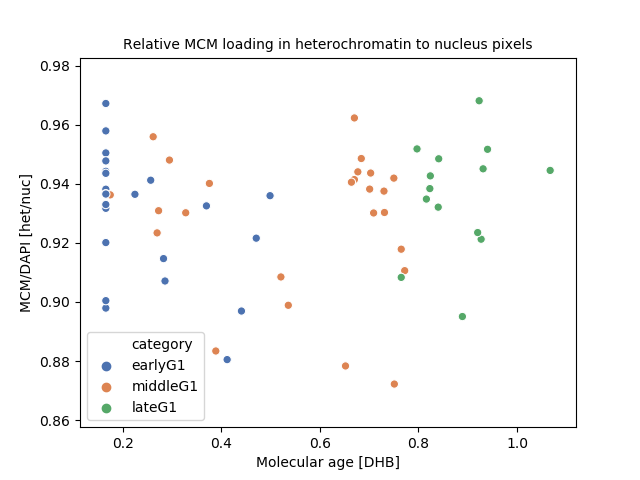

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [55]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


<IPython.core.display.Javascript object>


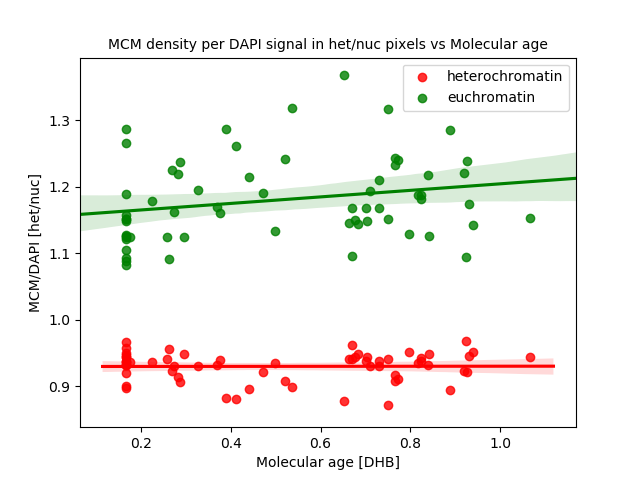

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [56]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_DAPI_eu)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

## Boxplot of relative mcm loading 

<IPython.core.display.Javascript object>


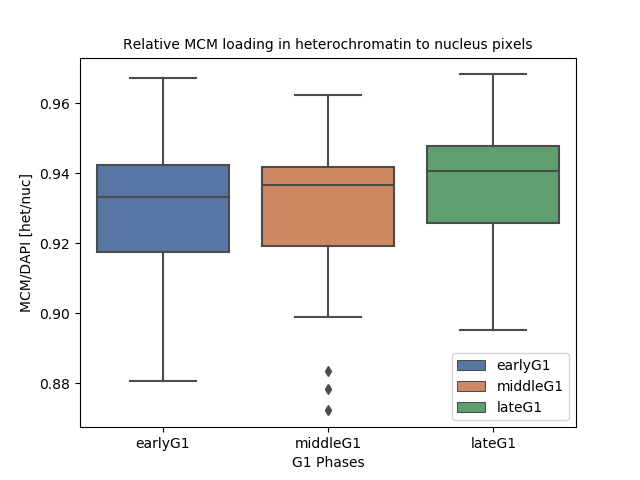

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [57]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.boxplot(x='category',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',order=['earlyG1','middleG1','lateG1'],hue_order=labels,dodge=False,palette='deep')
ax.legend(loc='lower right')
plt.xlabel('G1 Phases')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)



## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


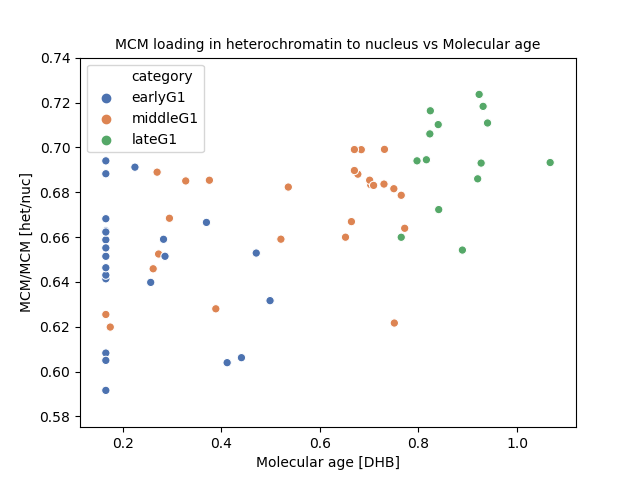

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [58]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

## MCM loading to euchromatin to nucleus

<IPython.core.display.Javascript object>


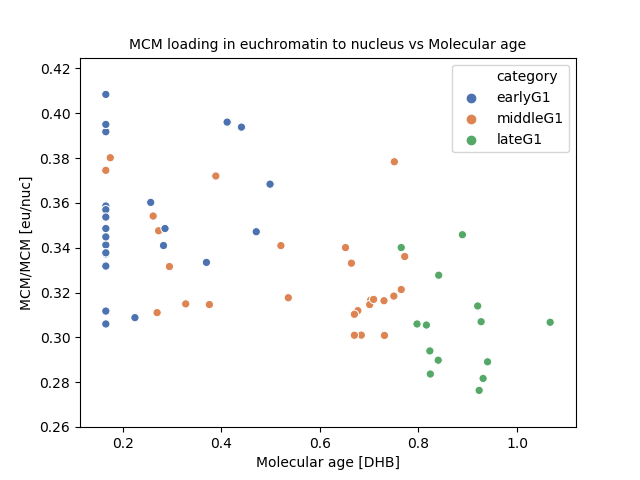

Text(0.5, 1.0, 'MCM loading in euchromatin to nucleus vs Molecular age')

In [59]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_eu/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [eu/nuc]')
plt.title('MCM loading in euchromatin to nucleus vs Molecular age', fontsize=10)

## MCM loading in heterochromatin and euchromatin to nucleus

<IPython.core.display.Javascript object>


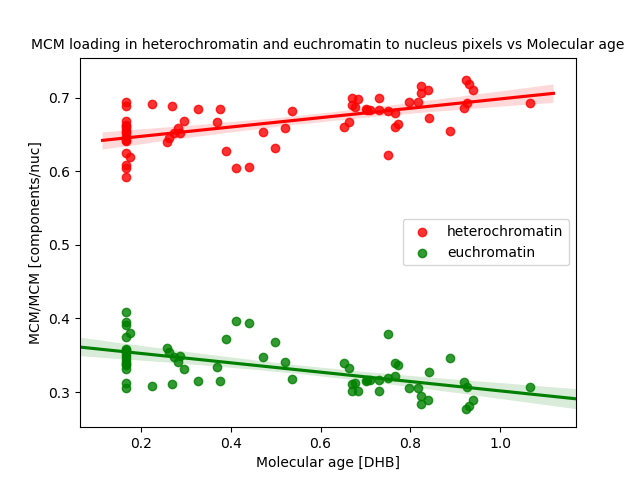

Text(0.5, 1.0, 'MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age')

In [60]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [components/nuc]')
plt.title('MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age', fontsize=10)

<IPython.core.display.Javascript object>


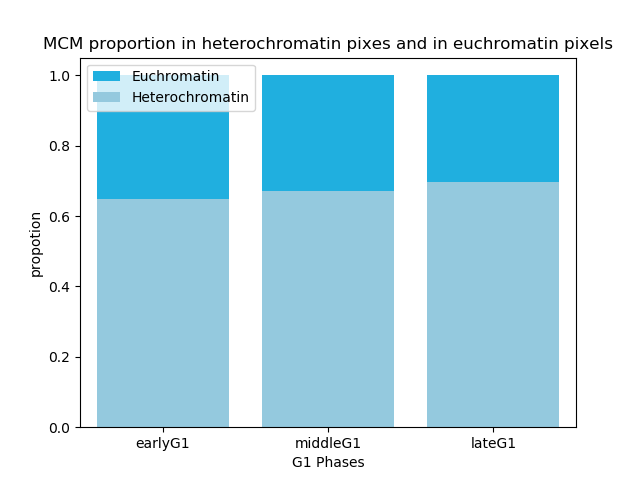

In [61]:
%matplotlib notebook
datatemp=data.loc[(['G1' in x for x in data.category]),:].copy()
datatemp['temp']=datatemp.nuc_mcm_het/datatemp.nuc_mcm_total
datatemp['temp1']=datatemp.nuc_mcm_eu/datatemp.nuc_mcm_total
datatemp['temp2']=datatemp['temp']+datatemp['temp1']
barhet = datatemp.loc[:,'temp']
bareu = datatemp.loc[:,'temp1']

xaxis=datatemp['category']
categories=['earlyG1','middleG1','lateG1']
ax = sns.barplot(x="category", y="temp2", data=datatemp,
                 order=["earlyG1", "middleG1",'lateG1'],color="deepskyblue",label="Euchromatin",ci=None)
sns.barplot(x="category",y="temp",data=datatemp,order=["earlyG1", "middleG1",'lateG1'],
            color="skyblue",label="Heterochromatin",ci=None)
plt.xlabel('G1 Phases')
plt.ylabel('propotion')
plt.title('MCM proportion in heterochromatin pixes and in euchromatin pixels')
plt.show()
#comp=['Heterochromatin','Euchromatin']
plt.legend(loc=2)